In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
# 데이터 불러오기
titanic_cleaned = pd.read_csv('titanic_cleaned.csv')

# 데이터 확인
titanic_cleaned.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True,False,False,False,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,False,True,False,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,True,False,False,False,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,False,True,False,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True,False,False,False,False,True


# 특성과 타겟 변수 분리

In [3]:
def split_features_and_target(data):
    """특성과 타겟 변수를 분리하는 함수"""
    X = data.drop('Survived', axis=1)
    y = data['Survived']
    return X, y

def split_train_test(X, y, test_size=0.2, random_state=42):
    """train 데이터와 test 데이터로 분할하는 함수"""
    # train_test_split: 데이터를 학습용 데이터와 테스트용 데이터로 분할하는 함수
    # X: 특성 데이터
    # y: 타겟 데이터
    # test_size: 테스트 데이터의 비율 (기본값: 0.2)
    # random_state: 난수 시드 (재현성을 위해 설정)
    # stratify: 데이터의 분포를 유지하기 위해 설정 (타겟 데이터 y를 기준으로 분할)
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

In [4]:
# 데이터 분할
X, y = split_features_and_target(titanic_cleaned)
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 생성

In [5]:
# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 결과 저장 함수 정의

In [6]:
# 결과 저장 함수 정의
def save_results(results_df, test_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    new_results = pd.DataFrame({
        'test_name': [test_name],
        'accuracy': [accuracy],
        'recall': [recall],
        'precision': [precision],
        'f1_score': [f1]
    })
    return pd.concat([results_df, new_results], ignore_index=True)

# 결과 저장

In [7]:
# 결과 저장
results_df = pd.DataFrame()  # 빈 데이터프레임 생성
results_df = save_results(results_df, 'base_line', y_test, y_pred)

# 결과 출력
results_df


,test_name,accuracy,recall,precision,f1_score
0,base_line,0.837989,0.73913,0.822581,0.778626


---

# 

# 피처 임포턴스 출력

In [8]:
# 피처 임포턴스 출력
importances = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
feature_importance_df

Feature Importances:


,Feature,Importance
2,Age,0.239034
5,Fare,0.227993
1,Sex,0.128786
8,Title_Mr,0.106544
0,Pclass,0.084853
3,SibSp,0.054209
9,Title_Mrs,0.038525
7,Title_Miss,0.036685
4,Parch,0.031835
13,Embarked_S,0.017117


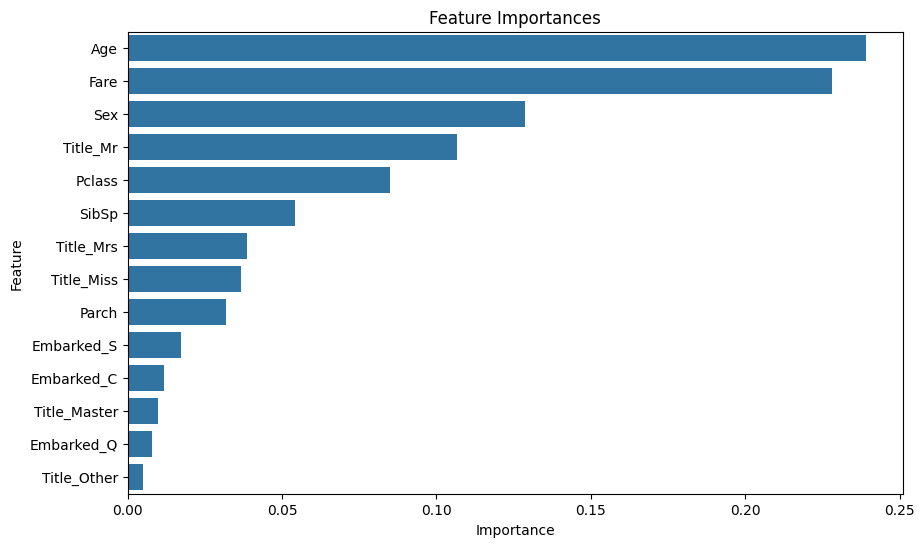

In [9]:
# 피처 임포턴스 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# 피쳐임포턴스가 높은 5개의 컬럼만 사용하여 학습 후 방금 전 성능과 비교

In [10]:
# 피쳐임포턴스가 높은 5개의 컬럼만 사용하여 학습 후 방금 전 성능과 비교해서 보여줘

# 상위 5개의 중요한 피쳐 선택
top_5_features = feature_importance_df.head(5)['Feature'].tolist()

# 상위 5개의 피쳐만 사용하여 데이터 분할
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

# 랜덤포레스트 모델 생성 및 학습
rf_model_top5 = RandomForestClassifier(random_state=42)
rf_model_top5.fit(X_train_top5, y_train)

# 예측 및 성능 평가
y_pred_top5 = rf_model_top5.predict(X_test_top5)  # predict_model 함수 대신 predict 메서드 사용
results_df = save_results(results_df, 'top5_col', y_test, y_pred_top5)

# 결과 출력
results_df


,test_name,accuracy,recall,precision,f1_score
0,base_line,0.837989,0.739130,0.822581,0.778626
1,top5_col,0.849162,0.797101,0.808824,0.802920


# 그리드 서치를 적용하여 성능 테스트

In [11]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치를 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 그리드 서치 객체 생성
# GridSearchCV 객체 생성
# estimator: 사용할 모델 (랜덤포레스트)
# param_grid: 하이퍼파라미터 그리드
# cv: 교차 검증 폴드 수
# n_jobs: 병렬 처리에 사용할 CPU 수 (-1은 모든 가용 CPU 사용)
# verbose: 출력 메시지 수준 (2는 상세 출력)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 최적의 파라미터로 모델 생성 및 학습
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_best = best_rf_model.predict(X_test)
results_df = save_results(results_df, 'grid_search', y_test, y_pred_best)

# 결과 출력
results_df


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8371417315079286


,test_name,accuracy,recall,precision,f1_score
0,base_line,0.837989,0.739130,0.822581,0.778626
1,top5_col,0.849162,0.797101,0.808824,0.802920
2,grid_search,0.843575,0.739130,0.836066,0.784615


---

# 5-fold 적용하여 성능 테스트

In [12]:
def create_kfold_splits(X_train, y_train, n_splits=5, random_state=42):
    """KFold를 사용하여 데이터 분할을 생성하는 함수"""
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold_results = []
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        fold_results.append((X_train_fold, X_val_fold, y_train_fold, y_val_fold))
    return fold_results

# 함수 호출
X, y = split_features_and_target(titanic_cleaned)
X_train, X_test, y_train, y_test = split_train_test(X, y)
fold_results = create_kfold_splits(X_train, y_train)

# 랜덤포레스트 성능 테스트

In [13]:
def evaluate_model_with_kfold(fold_results, model, test_name, existing_df=None):
    """KFold 결과를 사용하여 모델 성능을 평가하고 기존 결과 데이터프레임에 새 결과를 추가하여 반환하는 함수"""
    metrics = {
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1_score': []
    }
    
    for X_train_fold, X_val_fold, y_train_fold, y_val_fold in fold_results:
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        
        metrics['accuracy'].append(accuracy_score(y_val_fold, y_pred))
        metrics['recall'].append(recall_score(y_val_fold, y_pred))
        metrics['precision'].append(precision_score(y_val_fold, y_pred))
        metrics['f1_score'].append(f1_score(y_val_fold, y_pred))
    
    new_result_df = pd.DataFrame([{
        'test_name': test_name,
        'accuracy': f"{np.mean(metrics['accuracy']):.4f}({np.std(metrics['accuracy']):.4f})",
        'recall': f"{np.mean(metrics['recall']):.4f}({np.std(metrics['recall']):.4f})",
        'precision': f"{np.mean(metrics['precision']):.4f}({np.std(metrics['precision']):.4f})",
        'f1_score': f"{np.mean(metrics['f1_score']):.4f}({np.std(metrics['f1_score']):.4f})"
    }])
    
    if existing_df is not None:
        return pd.concat([existing_df, new_result_df], ignore_index=True)
    else:
        return new_result_df

# 성능 평가
rf_model = RandomForestClassifier(random_state=42)  # 객체화된 모델 생성
fold_results_df = evaluate_model_with_kfold(fold_results, rf_model, 'base_line')
fold_results_df


,test_name,accuracy,recall,precision,f1_score
0,base_line,0.8119(0.0302),0.7439(0.0511),0.7632(0.0669),0.7511(0.0432)


# 이상치 처리 후 랜덤 포레스트 성능 테스트

In [14]:
def remove_outliers(df, column):
    """이상치를 제거하는 함수"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def create_kfold_splits_with_outlier_removal(X_train, y_train, n_splits=5, random_state=42):
    """이상치를 제거한 후 KFold를 사용하여 데이터 분할을 생성하는 함수"""
    # 이상치를 제거한 X_train 생성
    X_train_no_outliers = remove_outliers(X_train, 'Age')
    X_train_no_outliers = remove_outliers(X_train_no_outliers, 'Fare')
    
    # 이상치가 제거된 X_train에 맞춰 y_train도 필터링
    y_train_no_outliers = y_train[X_train_no_outliers.index]
    
    # 기존의 create_kfold_splits 함수 사용
    return create_kfold_splits(X_train_no_outliers, y_train_no_outliers, 
                               n_splits=n_splits, random_state=random_state)

# 이상치를 제외한 fold 생성
fold_results_no_outliers = create_kfold_splits_with_outlier_removal(X_train, y_train)


# 이상치 처리한 데이터로 성능을 체크

In [15]:
rf_model_no_outliers = RandomForestClassifier(random_state=42)  # 객체화된 모델 생성
fold_results_df = evaluate_model_with_kfold(fold_results_no_outliers, rf_model_no_outliers, 'no_outliers', fold_results_df)
fold_results_df

,test_name,accuracy,recall,precision,f1_score
0,base_line,0.8119(0.0302),0.7439(0.0511),0.7632(0.0669),0.7511(0.0432)
1,no_outliers,0.8246(0.0235),0.7051(0.0600),0.7644(0.0360),0.7313(0.0302)


# 이상치 제거 후 정규화 적용 및 성능 테스트

In [16]:
# 정규화 적용
scaler = StandardScaler()

# fold_results_no_outliers의 각 fold에 대해 정규화 적용
fold_results_no_outliers_scaled = []
for X_train_fold, X_val_fold, y_train_fold, y_val_fold in fold_results_no_outliers:
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)
    fold_results_no_outliers_scaled.append((X_train_fold_scaled, X_val_fold_scaled, y_train_fold, y_val_fold))

# 정규화된 데이터로 성능 체크
rf_model_no_outliers_scaled = RandomForestClassifier(random_state=42)  # 객체화된 모델 생성
fold_results_df = evaluate_model_with_kfold(fold_results_no_outliers_scaled, rf_model_no_outliers_scaled, 'no_outliers_scaled', fold_results_df)


In [17]:
# 정밀도 기준으로 내림차순 정렬
fold_results_df = fold_results_df.sort_values(by='precision', ascending=False)
fold_results_df


,test_name,accuracy,recall,precision,f1_score
2,no_outliers_scaled,0.8230(0.0198),0.6945(0.0535),0.7663(0.0329),0.7265(0.0227)
1,no_outliers,0.8246(0.0235),0.7051(0.0600),0.7644(0.0360),0.7313(0.0302)
0,base_line,0.8119(0.0302),0.7439(0.0511),0.7632(0.0669),0.7511(0.0432)
